In [1]:
import pandas as pd
import sys
import redcap
from credentials import token_pid353
from credentials import redcap_api_url
sys.path.insert(0, '../toolbox/')
from general_tools import compare_similar_dataframes

### Compare data fields in existing REDCap project and sample file and data dictionary

In [2]:
df_upload = pd.read_csv("DCIPHER_upload.csv") #upload from redcap to dcipher
df_dictionary = pd.read_csv("dcipher_data_dict_fields.csv", header = None) #cdc provided data dictionary
df_samplefile = pd.read_csv("CDC_DCIPHER_export_sample.csv") #sample file from Breanna

fields_upload = df_upload.columns
fields_dictionary = df_dictionary.loc[:,0]
fields_samplefile = df_samplefile.columns
#fields_pid171

In [3]:
# Is the data dictionary identical to fields being uploaded TO dcipher?
print(len(set(fields_upload) & set(fields_dictionary)))
print((set(fields_upload) == set(fields_dictionary)))

86
True


In [4]:
#number of columns 
print(len(fields_upload))
print(len(fields_dictionary))
print(len(fields_samplefile))

86
86
94


In [5]:
# same length as fields from data dictionary, dcipher file has an additional 8 new fields
len((set(fields_samplefile) & set(fields_dictionary)))

86

In [6]:
extra_fields = set(fields_samplefile) - set(fields_dictionary)
extra_fields

{'created_at',
 'created_at_tz',
 'dcipher_unique_id',
 'flag_old_schema',
 'jurisdiction_policy_rid',
 'sample_first_reported',
 'sample_first_reported_tz',
 'source'}

# Convert DCIPHER long format to REDCap wide format for select fields


# How many unique CDC samples are there?

In [7]:
redcap_sample_ids = df_upload["sample_id"].astype("str")

In [8]:
cdc_unique = df_samplefile[~df_samplefile["sample_id"].isin(redcap_sample_ids)]["sample_id"].unique()

In [9]:
len(cdc_unique)

390

In [23]:
dates = df_samplefile[df_samplefile["sample_id"].isin(cdc_unique)]['sample_collect_date']
dates = pd.to_datetime(dates)
dates = dates.sort_values()
dates.reset_index(drop = True, inplace = True)

In [26]:
total_counts = pd.Series(np.arange(0,1036))

In [28]:
df_cdc_dates = pd.concat([dates, total_counts], axis = 1)

In [30]:
df_cdc_dates.set_index("sample_collect_date", inplace = True)

<AxesSubplot:xlabel='sample_collect_date'>

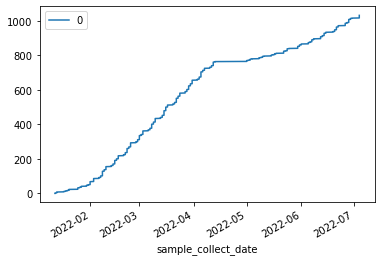

In [31]:
df_cdc_dates.plot()

In [ ]:
df_cdc_dates

### How many DCIPHER fields come from REDCap PID171?

In [ ]:
#redcap fields
project = redcap.Project(url = redcap_api_url, token=token_pid353)
df_redcap = project.export_records(format_type = "df")
redcap_fields = df_redcap.columns

In [ ]:
#how many fields in each dataset?
print(f"REDCap Fields: {len(redcap_fields)}")
print(f"DCIPHER Fields from sample file: {len(fields_samplefile)}")

In [ ]:
#how many fields in common? 
in_common = set(redcap_fields) & set(fields_samplefile)
print(f"Fields in common: {len(in_common)}")

In [ ]:
# the dcipher columns from previous transform project
from credentials import dcipher_clms
print(len(dcipher_clms))

In [ ]:
in_common_historic = set(redcap_fields) & set(dcipher_clms)
print(f"Fields in common: {len(in_common_historic)}")

In [ ]:
in_common

In [ ]:
[i for i in fields_samplefile]

In [ ]:
df_samplefile[[
    'sample_id',
    'lab_id',
    "source",
    'sample_location',
     'sample_location_specify',
     'institution_type',
     'epaid',
     'wwtp_name',
     'wwtp_jurisdiction']]

In [ ]:
df_samplefile[df_samplefile["sample_id"] == "20001"]

In [ ]:
df_samplefile["sample_id"].unique()